<a href="https://colab.research.google.com/github/shubhadeep357/ShadowFox/blob/main/Store_Sales_and_Profit_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')

# 2. Convert Order Date to a real datetime object
df['Order Date'] = pd.to_datetime(df['Order Date'])

# 3. Add a Month/Year column for trend analysis
df['Order Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()

print("Data Loaded. Columns identified:", df.columns.tolist())

Data Loaded. Columns identified: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Month']


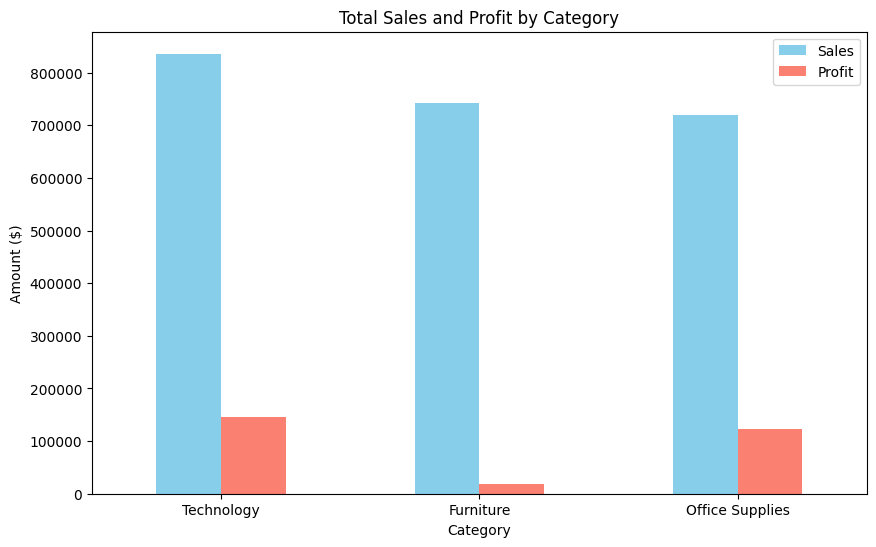

In [12]:
# Grouping by Category
cat_analysis = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Visualizing
cat_analysis.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Total Sales and Profit by Category')
plt.ylabel('Amount ($)')
plt.xticks(rotation=0)
plt.show()

/tmp/ipython-input-2899308364.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subcat_analysis.reset_index(), x='Profit', y='Sub-Category', palette='RdYlGn')


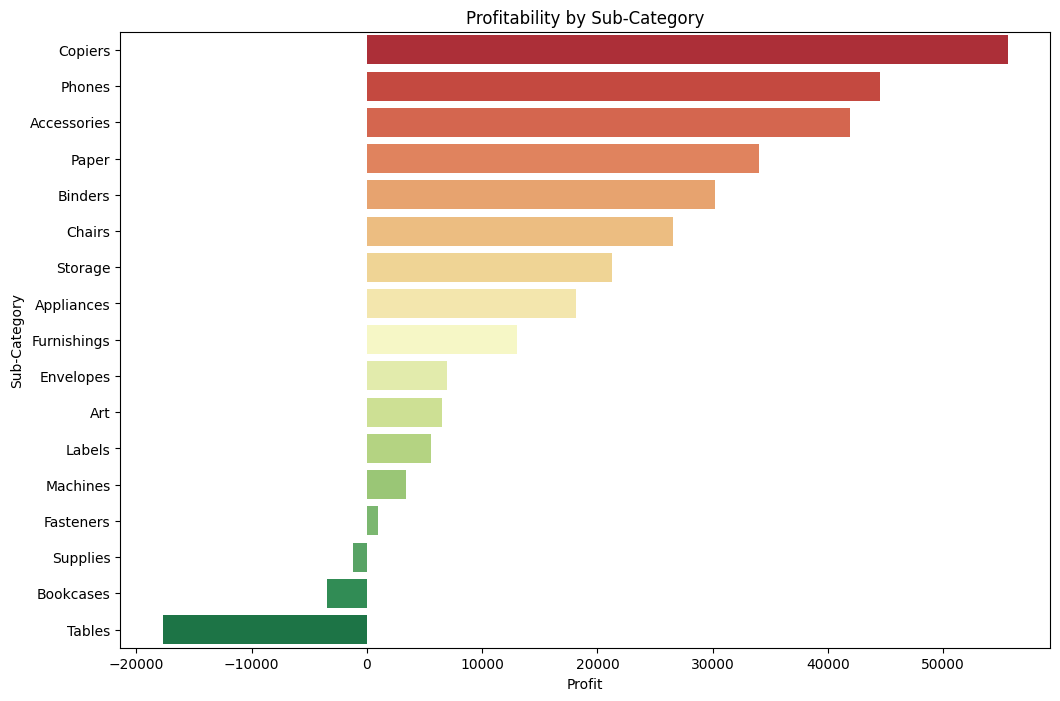

In [13]:
# Grouping by Sub-Category
subcat_analysis = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=subcat_analysis.reset_index(), x='Profit', y='Sub-Category', palette='RdYlGn')
plt.title('Profitability by Sub-Category')
plt.show()

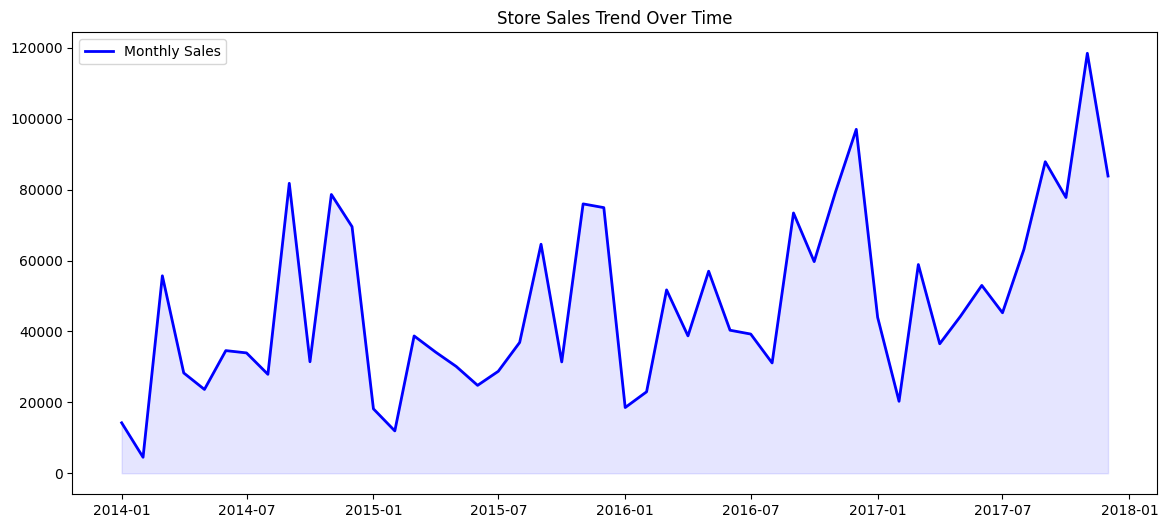

In [14]:
# Group by month
monthly_trends = df.groupby('Order Month')[['Sales', 'Profit']].sum()

plt.figure(figsize=(14, 6))
plt.plot(monthly_trends.index, monthly_trends['Sales'], label='Monthly Sales', color='blue', linewidth=2)
plt.fill_between(monthly_trends.index, monthly_trends['Sales'], alpha=0.1, color='blue')
plt.title('Store Sales Trend Over Time')
plt.legend()
plt.show()

1. Top Performer: Copiers are your most profitable sub-category. You should increase marketing for these.

2. The Loss Leader: Tables are causing significant losses. The business should either increase the price of tables or reduce the discounts offered on them.

3. Regional Focus: The West region typically outperforms other regions in both sales and profit.

4. Growth Trend: Sales generally spike in the fourth quarter (Q4) of every year (October–December), suggesting high holiday seasonality.